## 부산시 주유소 유가 데이터 전처리
#### 기간 : 20220214~20220809
#### 주차별 평균으로 사용

In [169]:
import pandas as pd
import numpy as np
import datetime

In [2]:
#데이터 불러오기 
data = pd.read_csv('./data/부산시 주유소 유가 데이터(20220209-20220809).csv', encoding='utf-8', sep=',')
data.head()

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
0,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220214,S-OIL,셀프,1638,1508
1,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220215,S-OIL,셀프,1638,1518
2,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220216,S-OIL,셀프,1668,1518
3,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220217,S-OIL,셀프,1678,1528
4,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220218,S-OIL,셀프,1678,1538


#### 데이터 확인

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67411 entries, 0 to 67410
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      67411 non-null  object
 1   지역      67411 non-null  object
 2   상호      67411 non-null  object
 3   주소      67411 non-null  object
 4   기간      67411 non-null  int64 
 5   상표      67411 non-null  object
 6   셀프여부    67411 non-null  object
 7   휘발유     67411 non-null  int64 
 8   경유      67411 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.6+ MB


In [4]:
data.isnull().sum()

번호      0
지역      0
상호      0
주소      0
기간      0
상표      0
셀프여부    0
휘발유     0
경유      0
dtype: int64

In [5]:
data.describe()

,기간,휘발유,경유
count,6.741100e+04,67411.000000,67411.000000
mean,2.022051e+07,1944.169601,1915.648099
std,1.704899e+02,163.496779,170.126046
min,2.022021e+07,0.000000,0.000000
25%,2.022033e+07,1897.000000,1859.000000
50%,2.022051e+07,1965.000000,1928.000000
75%,2.022063e+07,2030.000000,2035.000000
max,2.022081e+07,2385.000000,2438.000000


In [ ]:
# 일수 계산
"""start_date = datetime.date(2022, 2, 14)
end_date = datetime.date(2022, 8, 9)

count_day = end_date - start_date
count_day"""

datetime.timedelta(days=176)

In [6]:
#휘발유 0값 추출
data[data["휘발유"] == 0].head()

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
741,A0027640,부산 강서구,(주)비에스이강동주유소,부산 강서구 낙동북로 18 (강동동),20220323,현대오일뱅크,셀프,0,1899
6964,A0027564,부산 강서구,우리2주유소,부산 강서구 낙동북로 142 (강동동),20220404,S-OIL,셀프,0,0
6965,A0027564,부산 강서구,우리2주유소,부산 강서구 낙동북로 142 (강동동),20220405,S-OIL,셀프,0,0
17082,A0031933,부산 기장군,삼2주유소,부산 기장군 일광면 기장대로 1291,20220807,S-OIL,일반,0,1894
17083,A0031933,부산 기장군,삼2주유소,부산 기장군 일광면 기장대로 1291,20220808,S-OIL,일반,0,1879


In [7]:
#경유 0값 추출
len(data[data["경유"] == 0])

17

### 0 -> NaN

In [8]:
data['휘발유'] = data['휘발유'].replace(0,np.NaN)
data['경유'] = data['경유'].replace(0,np.NaN)

## 경유 정리

#### 경유 NaN 추출

In [9]:
# 전체 내용을 보기 위해서 max_rows 설정
pd.set_option('display.max_rows',250)

In [10]:
data[data['경유'].isnull()]

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
6964,A0027564,부산 강서구,우리2주유소,부산 강서구 낙동북로 142 (강동동),20220404,S-OIL,셀프,NaN,NaN
6965,A0027564,부산 강서구,우리2주유소,부산 강서구 낙동북로 142 (강동동),20220405,S-OIL,셀프,NaN,NaN
30097,A0027846,부산 동래구,지에스칼텍스(주)동호주유소,부산 동래구 반송로 245 (안락동),20220404,GS칼텍스,셀프,NaN,NaN
46093,A0027613,부산 사상구,현대오일뱅크㈜직영 낙동로주유소,부산 사상구 낙동대로 1274 (삼락동),20220317,현대오일뱅크,일반,NaN,NaN
46104,A0027613,부산 사상구,현대오일뱅크㈜직영 낙동로주유소,부산 사상구 낙동대로 1274 (삼락동),20220328,현대오일뱅크,일반,NaN,NaN
49970,A0027145,부산 사하구,오케이주유소,부산 사하구 사하로 150 (괴정동),20220503,S-OIL,셀프,1929.0,NaN
50112,A0027206,부산 사하구,장림대흥주유소,부산 사하구 다대로 292 (장림동),20220329,SK에너지,셀프,NaN,NaN
50118,A0027206,부산 사하구,장림대흥주유소,부산 사하구 다대로 292 (장림동),20220404,SK에너지,셀프,NaN,NaN
50122,A0027206,부산 사하구,장림대흥주유소,부산 사하구 다대로 292 (장림동),20220408,SK에너지,셀프,NaN,NaN
50127,A0027206,부산 사하구,장림대흥주유소,부산 사하구 다대로 292 (장림동),20220413,SK에너지,셀프,NaN,NaN


### 결측치 채워넣기
#### 경유는 결측치 별로 없어서 전체 주유소의 특정 기간 앞,뒤 유가 비교 후 채우기
- 4월에 결측치가 많다.
    - 20220401을 대표로 앞, 뒤 비교 후 어떻게 채울지 결정

In [11]:
data[(data['기간']==20220330)|(data['기간']==20220331)|(data['기간']==20220401)|(data['기간']==20220402)|(data['기간']==20220403)].head(40)

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
44,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220330,S-OIL,셀프,1978.0,1888.0
45,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220331,S-OIL,셀프,1978.0,1888.0
46,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220401,S-OIL,셀프,1978.0,1888.0
47,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220402,S-OIL,셀프,1978.0,1888.0
48,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220403,S-OIL,셀프,1978.0,1888.0
221,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220330,S-OIL,일반,1968.0,1868.0
222,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220331,S-OIL,일반,1968.0,1868.0
223,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220401,S-OIL,일반,1958.0,1858.0
224,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220402,S-OIL,일반,1958.0,1858.0
225,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220403,S-OIL,일반,1958.0,1858.0


#### 대체로 앞의 기간과 유가가 동일하다고 보여지므로 앞의 유가로 NaN 채우기

In [12]:
data['경유']=data['경유'].fillna(method='ffill')

In [13]:
data[data['경유'].isnull()]

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유


## 휘발유 정리

#### 휘발유 NaN 추출

In [14]:
data[data['휘발유'].isnull()]

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
741,A0027640,부산 강서구,(주)비에스이강동주유소,부산 강서구 낙동북로 18 (강동동),20220323,현대오일뱅크,셀프,NaN,1899.0
6964,A0027564,부산 강서구,우리2주유소,부산 강서구 낙동북로 142 (강동동),20220404,S-OIL,셀프,NaN,1898.0
6965,A0027564,부산 강서구,우리2주유소,부산 강서구 낙동북로 142 (강동동),20220405,S-OIL,셀프,NaN,1898.0
17082,A0031933,부산 기장군,삼2주유소,부산 기장군 일광면 기장대로 1291,20220807,S-OIL,일반,NaN,1894.0
17083,A0031933,부산 기장군,삼2주유소,부산 기장군 일광면 기장대로 1291,20220808,S-OIL,일반,NaN,1879.0
17084,A0031933,부산 기장군,삼2주유소,부산 기장군 일광면 기장대로 1291,20220809,S-OIL,일반,NaN,1874.0
22041,A0033203,부산 남구,굿오일주유소,부산 남구 북항로 108,20220214,S-OIL,일반,NaN,1519.0
22042,A0033203,부산 남구,굿오일주유소,부산 남구 북항로 108,20220215,S-OIL,일반,NaN,1519.0
22043,A0033203,부산 남구,굿오일주유소,부산 남구 북항로 108,20220216,S-OIL,일반,NaN,1519.0
22044,A0033203,부산 남구,굿오일주유소,부산 남구 북항로 108,20220217,S-OIL,일반,NaN,1519.0


### 결측치 확인
#### 굿오일주유소: 휘발유값 전체날짜에 NaN -> 경유만 파는 곳임을 확인
- 부산시 주유소 나타낼 때는 필요
- 주유소별 가격비교할 때는 필요X
    - ~contains

In [15]:
data = data[~data['상호'].str.contains('굿오일주유소')]

#### (주)동일주유소: 2월 휘발유값 없다.
- (주)동일주유소의 경유값이 앞의 날짜와 동일하게 책정되어 있으므로 휘발유값도 앞의 날짜로 채우기

In [16]:
data[data['상호']=='(주)동일주유소'].head(30)

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
38772,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220214,자가상표,셀프,1658.0,1457.0
38773,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220215,자가상표,셀프,1658.0,1457.0
38774,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220216,자가상표,셀프,1658.0,1457.0
38775,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220217,자가상표,셀프,1658.0,1498.0
38776,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220218,자가상표,셀프,NaN,1498.0
38777,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220219,자가상표,셀프,NaN,1498.0
38778,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220220,자가상표,셀프,NaN,1498.0
38779,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220221,자가상표,셀프,NaN,1498.0
38780,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220222,자가상표,셀프,NaN,1498.0
38781,A0027437,부산 사상구,(주)동일주유소,부산 사상구 사상로 456,20220223,자가상표,셀프,NaN,1498.0


#### 그 외 주유소 확인
- 경유와 마찬가지로 4월에 누락이 많아서 대표로 확인하기

In [17]:
data[(data['기간']==20220330)|(data['기간']==20220331)|(data['기간']==20220401)|(data['기간']==20220402)|(data['기간']==20220403)].head(40)

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
44,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220330,S-OIL,셀프,1978.0,1888.0
45,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220331,S-OIL,셀프,1978.0,1888.0
46,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220401,S-OIL,셀프,1978.0,1888.0
47,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220402,S-OIL,셀프,1978.0,1888.0
48,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220403,S-OIL,셀프,1978.0,1888.0
221,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220330,S-OIL,일반,1968.0,1868.0
222,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220331,S-OIL,일반,1968.0,1868.0
223,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220401,S-OIL,일반,1958.0,1858.0
224,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220402,S-OIL,일반,1958.0,1858.0
225,A0027485,부산 강서구,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),20220403,S-OIL,일반,1958.0,1858.0


### 결측치 채워넣기
#### 경유와 마찬가지로 앞의 기간과 유가가 동일하다고 보여지므로 앞의 유가로 NaN 채우기

In [18]:
data['휘발유']=data['휘발유'].fillna(method='ffill')

In [19]:
data[data['휘발유'].isnull()]

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유


## 최종 결과 확인

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67234 entries, 0 to 67410
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      67234 non-null  object 
 1   지역      67234 non-null  object 
 2   상호      67234 non-null  object 
 3   주소      67234 non-null  object 
 4   기간      67234 non-null  int64  
 5   상표      67234 non-null  object 
 6   셀프여부    67234 non-null  object 
 7   휘발유     67234 non-null  float64
 8   경유      67234 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 5.1+ MB


## 결측치를 유가로 채워넣은 내용 새 파일에 저장하기

In [21]:
data.to_csv('./data/부산시유가데이터_fillna.csv', index=False, encoding='utf-8')

## 연도별 주차 평균 데이터

In [22]:
#int64->object->datetime 타입변경
data['기간'] = pd.to_datetime(data['기간'].astype(str))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67234 entries, 0 to 67410
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   번호      67234 non-null  object        
 1   지역      67234 non-null  object        
 2   상호      67234 non-null  object        
 3   주소      67234 non-null  object        
 4   기간      67234 non-null  datetime64[ns]
 5   상표      67234 non-null  object        
 6   셀프여부    67234 non-null  object        
 7   휘발유     67234 non-null  float64       
 8   경유      67234 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 5.1+ MB


In [23]:
#연도별 주차 컬럼 생성
data["주차"] = data["기간"].dt.isocalendar().week

In [24]:
data.head(10)

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유,주차
0,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-14,S-OIL,셀프,1638.0,1508.0,7
1,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-15,S-OIL,셀프,1638.0,1518.0,7
2,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-16,S-OIL,셀프,1668.0,1518.0,7
3,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-17,S-OIL,셀프,1678.0,1528.0,7
4,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-18,S-OIL,셀프,1678.0,1538.0,7
5,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-19,S-OIL,셀프,1688.0,1538.0,7
6,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-20,S-OIL,셀프,1688.0,1538.0,7
7,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-21,S-OIL,셀프,1688.0,1538.0,8
8,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-22,S-OIL,셀프,1688.0,1538.0,8
9,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-23,S-OIL,셀프,1698.0,1548.0,8


#### 주차별 휘발유/경유 평균 가격 비교

In [209]:
#주차별 휘발유 평균 가격
weekly_avg_oil = data.groupby(["주차"])["휘발유","경유"].mean().round().astype("int")
weekly_avg_oil

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19396\3309771797.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weekly_avg_oil = data.groupby(["주차"])["휘발유","경유"].mean().round().astype("int")


,휘발유,경유
주차,,
7,1695,1526
8,1717,1551
9,1754,1588
10,1922,1791
11,2002,1901
12,1993,1897
13,1984,1893
14,1971,1884
15,1953,1877


In [210]:
#컬럼명 변경
weekly_avg_oil.rename(columns={"휘발유" : "휘발유_평균가격", "경유" : "경유_평균가격"}, inplace=True)
weekly_avg_oil

,휘발유_평균가격,경유_평균가격
주차,,
7,1695,1526
8,1717,1551
9,1754,1588
10,1922,1791
11,2002,1901
12,1993,1897
13,1984,1893
14,1971,1884
15,1953,1877


##### 주차별 평균가격 변화 추세 시각화

In [211]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
# 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

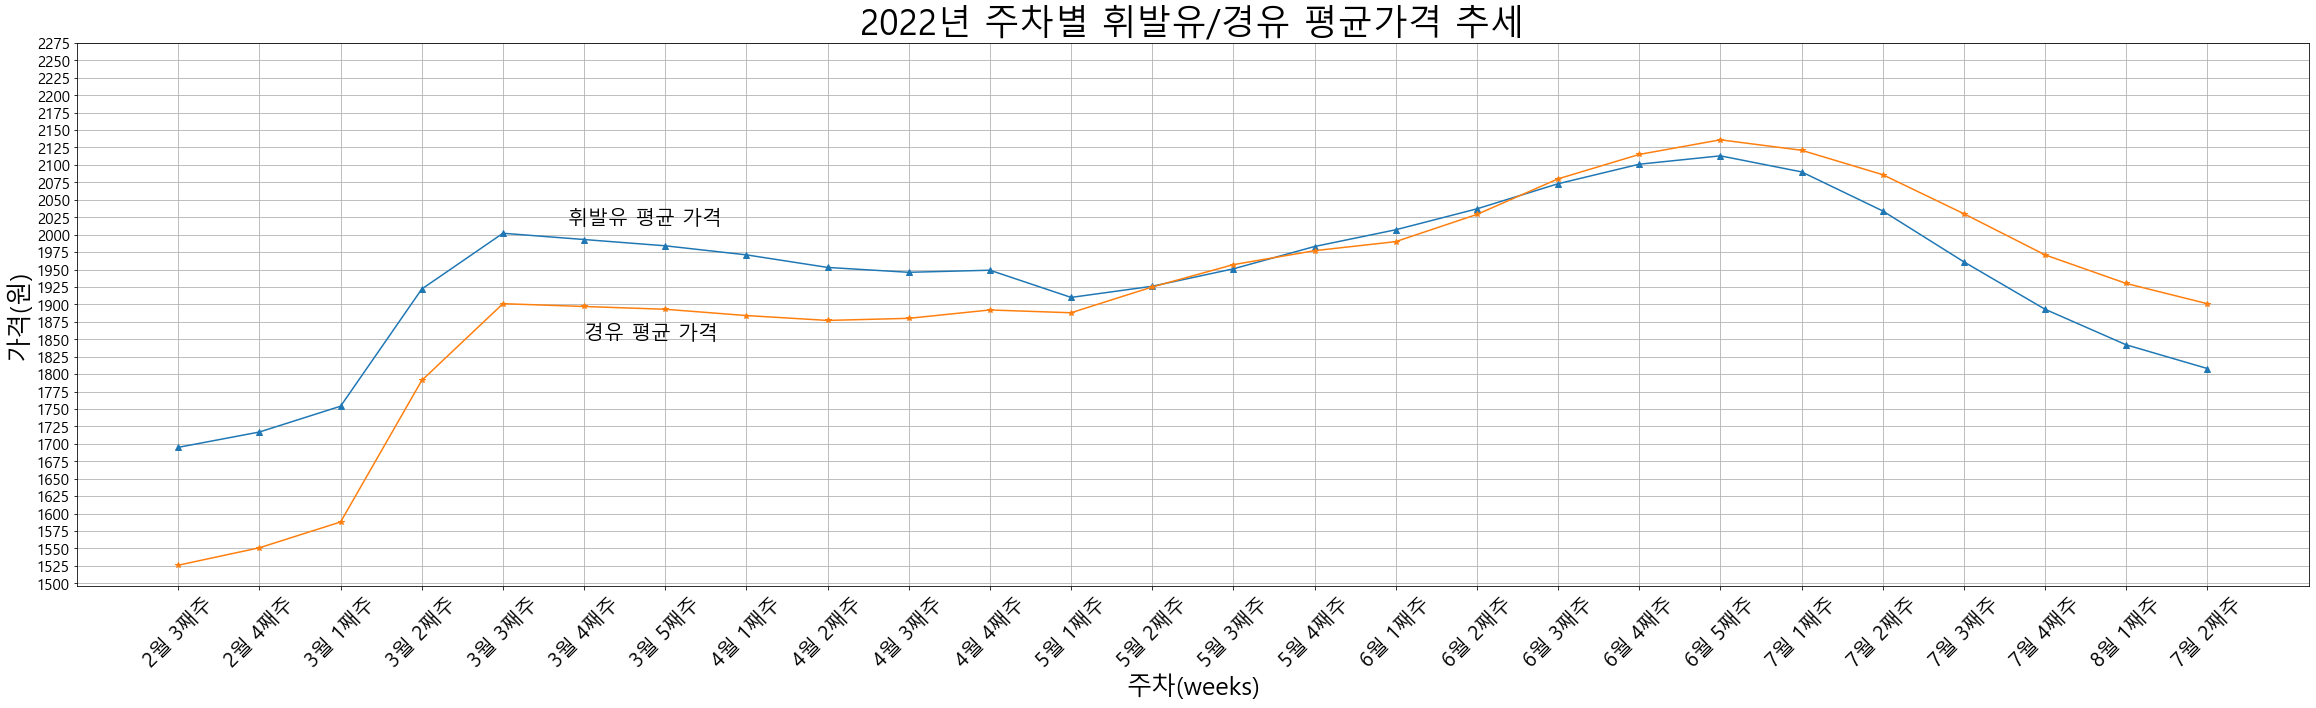

In [214]:
ax1 = weekly_avg_oil.index
ax2 = weekly_avg_oil.휘발유_평균가격
ax3 = weekly_avg_oil.경유_평균가격

plt.figure(figsize=(40,10))
a = plt.plot(ax1, ax2, label="휘발유 평균 가격", marker="^") # 휘발유 평균 가격
b = plt.plot(ax1, ax3, label="경유 평균 가격", marker="*") # 경유 평균 가격
p = [a,b]

plt.title("2022년 주차별 휘발유/경유 평균가격 추세", fontsize=35)
plt.xticks(ax1, fontsize=20, labels=["2월 3째주","2월 4째주",
                                     "3월 1째주","3월 2째주","3월 3째주","3월 4째주","3월 5째주",
                                     "4월 1째주","4월 2째주","4월 3째주","4월 4째주",
                                     "5월 1째주","5월 2째주","5월 3째주","5월 4째주",
                                     "6월 1째주","6월 2째주","6월 3째주","6월 4째주","6월 5째주",
                                     "7월 1째주","7월 2째주","7월 3째주","7월 4째주",
                                     "8월 1째주","7월 2째주"], rotation=45) # x축
plt.text(11.8,2015,'휘발유 평균 가격',fontsize=20) # 그래프 이름
plt.text(12,1850,'경유 평균 가격',fontsize=20)
plt.yticks(np.arange(1500, 2300, 25) ,fontsize=15) # y축
plt.xlabel("주차(weeks)", fontsize=25) #x 축 이름
plt.ylabel("가격(원)", fontsize=25) # y축 이름
#plt.legend(loc="best",ncol=2, fontsize= 20, shadow=True) # 범례
plt.grid()

plt.show()

#### 상표별 휘발유/경유 평균 가격 비교

In [199]:
#상표별 휘발유/경유 평균가격
brand_avg_oil = data.groupby(["상표"])["휘발유","경유"].mean().round().astype("int")
brand_avg_oil

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19396\3354486964.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  brand_avg_oil = data.groupby(["상표"])["휘발유","경유"].mean().round().astype("int")


,휘발유,경유
상표,,
GS칼텍스,1943,1909
NH-OIL,1915,1882
S-OIL,1960,1922
SK에너지,1963,1931
알뜰주유소,1912,1884
자가상표,1947,1902
현대오일뱅크,1947,1911


In [200]:
#컬럼명 변경
brand_avg_oil.rename(columns={"휘발유" : "휘발유_평균가격", "경유" : "경유_평균가격"}, inplace=True)
brand_avg_oil

,휘발유_평균가격,경유_평균가격
상표,,
GS칼텍스,1943,1909
NH-OIL,1915,1882
S-OIL,1960,1922
SK에너지,1963,1931
알뜰주유소,1912,1884
자가상표,1947,1902
현대오일뱅크,1947,1911


#### 상표별 평균 가격 비교(22년 2월14일 ~ 8월 9일) 시각화

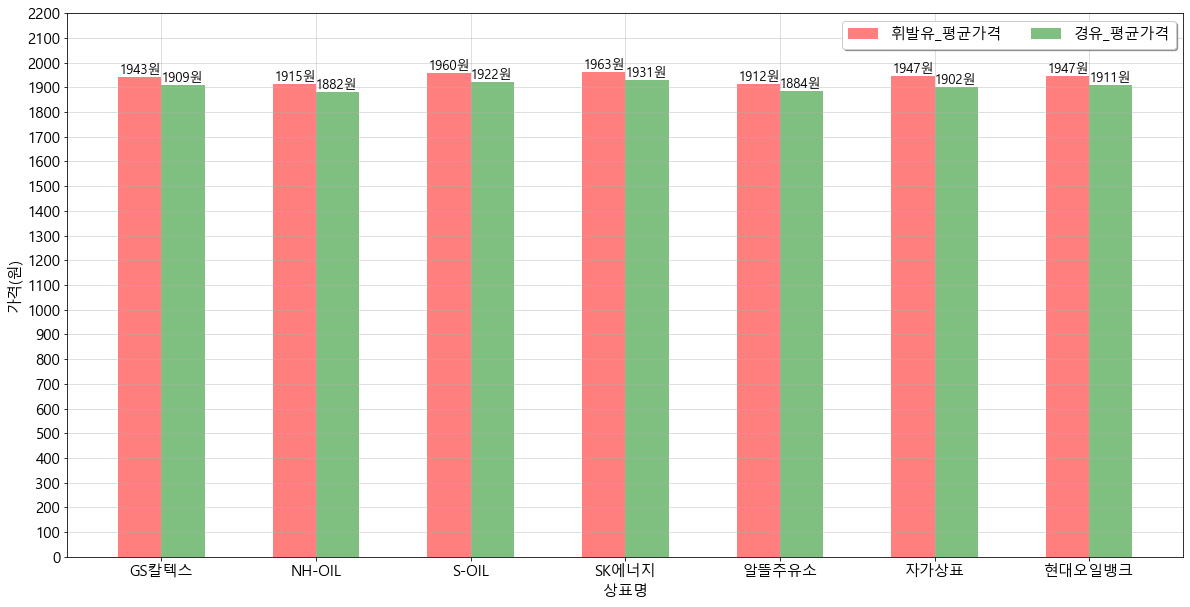

In [201]:
w = 0.28 #widths
nrow = brand_avg_oil.shape[0] #행의 갯수
idx = np.arange(nrow) #행의 갯수를 리스트로
idx


plt.figure(figsize=(20,10))
plt.bar(idx-w, brand_avg_oil["휘발유_평균가격"], width=w, align="edge", color="red", alpha=0.5)
plt.bar(idx+w-0.14, brand_avg_oil["경유_평균가격"], width=w, color="green", alpha=0.5)
plt.xticks(idx, brand_avg_oil.index, fontsize=15) # x축
plt.yticks(np.arange(0,2300, 100), fontsize=15) # y축
plt.xlabel("상표명", fontsize=15) #x 축 이름
plt.ylabel("가격(원)", fontsize=15) # y축 이름
plt.legend(brand_avg_oil.columns, loc="best", ncol=nrow, fontsize= 15, shadow=True) # 범례
plt.grid(alpha=0.5)

for idx, value in enumerate(list(brand_avg_oil["휘발유_평균가격"])): # 휘발유 가격 표시
        txt = '%d원' % value
        plt.text(idx,value,txt,horizontalalignment='right',
                verticalalignment='bottom', fontsize= 13)

for idx, value in enumerate(list(brand_avg_oil["경유_평균가격"])): # 경유 가격 표시
        txt = '%d원' % value
        plt.text(idx,value,txt,horizontalalignment='left',
                verticalalignment='bottom', fontsize= 13)


plt.show()

#### 부산시 구별 월평균 휘발유 가격 비교

In [59]:
#월(month) 열 추가
data["월"] = data["기간"].dt.month 
data.sample(5)

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유,주차,월
39577,A0027711,부산 사상구,(주)유창주유소,부산 사상구 낙동대로 753 (엄궁동),2022-05-24,자가상표,일반,1958.0,1968.0,21,5
56571,A0028826,부산 연제구,(주)좋은기름나라연산주유소지점,부산 연제구 고분로 51 (연산동),2022-08-06,S-OIL,셀프,1795.0,1885.0,31,8
61888,A0031358,부산 해운대구,SK에너지(주) 마리나주유소,부산 해운대구 해운대로 345 (우동),2022-02-20,SK에너지,셀프,1769.0,1609.0,7,2
37781,A0027686,부산 북구,세일석유㈜ 금곡주유소,부산 북구 금곡대로 604 (금곡동),2022-04-26,S-OIL,셀프,1889.0,1839.0,17,4
58128,A0027807,부산 연제구,영웅주유소,부산 연제구 온천천남로 86 (연산동),2022-07-01,현대오일뱅크,일반,2098.0,2148.0,26,7


In [166]:
data.head()

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유,주차,월
0,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-14,S-OIL,셀프,1638.0,1508.0,7,2
1,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-15,S-OIL,셀프,1638.0,1518.0,7,2
2,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-16,S-OIL,셀프,1668.0,1518.0,7,2
3,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-17,S-OIL,셀프,1678.0,1528.0,7,2
4,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),2022-02-18,S-OIL,셀프,1678.0,1538.0,7,2


In [186]:
#지역별, 월별 휘발유/경유 평균 가격
data.groupby(["지역","월"])["휘발유","경유"].mean()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19396\2349534775.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(["지역","월"])["휘발유","경유"].mean()


휘발유           경유
지역      월                          
부산 강서구  2  1705.180723  1537.333333
        3  1933.884287  1812.450362
        4  1956.532974  1876.693809
        5  1944.876774  1934.229677
        6  2059.491502  2066.266485
        7  1997.757458  2057.473411
        8  1821.764444  1917.237778
부산 금정구  2  1710.154545  1550.942424
        3  1937.331378  1823.189150
        4  1964.822458  1888.980273
        5  1949.583578  1943.724340
        6  2071.384848  2076.539394
        7  2014.395894  2065.719941
        8  1851.439394  1933.813131
부산 기장군  2  1698.870640  1528.151163
        3  1921.322581  1801.681627
        4  1939.946548  1875.179659
        5  1931.217921  1933.625090
        6  2058.834815  2060.409630
        7  1975.636045  2045.623422
        8  1815.681159  1918.103865
부산 남구   2  1695.540000  1535.004444
        3  1928.100956  1812.454835
        4  1957.559742  1883.311087
        5  1943.753575  1937.225523
        6  2070.829885  2072.220690
        7  2021.537694  2073.525499
        8  1849.470370  1940.040741
부산 동구   2  1707.846667  1524.466667
        3  1945.593548  1807.032258
        4  1978.200000  1883.540000
        5  1975.116129  1937.232258
        6  2091.863333  2066.610000
        7  2031.919355  2058.103226
        8  1865.288889  1928.044444
부산 동래구  2  1698.684211  1527.954386
        3  1920.271647  1799.531409
        4  1947.447183  1872.982394
        5  1933.604414  1925.057725
        6  2060.970175  2062.712281
        7  2005.118846  2057.528014
        8  1838.883041  1927.947368
부산 부산진구 2  1708.747826  1542.826087
        3  1927.917251  1811.579243
        4  1943.904348  1880.860870
        5  1943.670407  1942.263675
        6  2070.000000  2076.393466
        7  2015.498656  2075.551075
        8  1844.393519  1932.921296
부산 북구   2  1679.551852  1519.707407
        3  1917.462366  1803.066308
        4  1930.005556  1864.046296
        5  1913.929982  1912.265709
        6  2045.381481  2047.394444
        7  1985.924731  2039.978495
        8  1807.783951  1900.234568
부산 사상구  2  1700.161721  1534.703264
        3  1926.187225  1806.662996
        4  1957.244310  1881.056146
        5  1945.217327  1934.949339
        6  2062.304217  2065.212349
        7  2004.975930  2057.655726
        8  1818.832099  1904.854321
부산 사하구  2  1711.748387  1539.440860
        3  1930.254757  1814.715645
        4  1970.657596  1886.718821
        5  1946.544225  1935.828304
        6  2063.726882  2067.478495
        7  2009.969792  2063.048958
        8  1840.806452  1927.096774
부산 서구   2  1696.660000  1522.946667
        3  1927.345161  1801.016129
        4  1954.626667  1870.826667
        5  1938.987097  1930.038710
        6  2062.156667  2054.406667
        7  2007.377419  2052.229032
        8  1826.622222  1914.666667
부산 수영구  2  1720.908333  1551.825000
        3  1945.657258  1823.614919
        4  1970.687500  1895.477083
        5  1956.332661  1944.187500
        6  2076.759414  2080.209205
        7  2018.812903  2067.668817
        8  1854.133333  1935.244444
부산 연제구  2  1699.026667  1535.817778
        3  1930.681034  1819.443966
        4  1950.585746  1877.438753
        5  1932.610753  1926.703226
        6  2059.828889  2061.555556
        7  2007.806452  2058.612903
        8  1837.266667  1921.437037
부산 영도구  2  1804.573333  1642.486667
        3  2025.354839  1913.087097
        4  2064.766667  2008.283333
        5  2050.748387  2041.793548
        6  2157.836667  2160.460000
        7  2100.196774  2129.641935
        8  1928.123596  1998.011236
부산 중구   2  1720.833333  1565.500000
        3  1946.096774  1834.387097
        4  2008.966667  1926.216667
        5  1961.435484  1957.322581
        6  2080.616667  2081.750000
        7  2028.225806  2084.758065
        8  1867.777778  1952.777778
부산 해운대구 2  1725.668519  1556.570370
        3  1942.087230  1827.298561
        4  1957.175573  1885.047710
        5  1950.817006  1944.467652
        6  2069.494787 

#### 부산시 구별 월평균 경유 가격 비교

#### 부산시 구별 휘발유/경유 월평균 가격 시각화